In [ ]:
# Dataset = https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
 94% 289M/307M [00:05<00:00, 74.7MB/s]
100% 307M/307M [00:05<00:00, 58.8MB/s]


In [3]:
# extracting zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/horses-or-humans-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# Training data and validation data from directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/horse-or-human/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 12,
    image_size = (256,256),
    seed=12
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/horse-or-human/validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 12,
    image_size = (256,256),
    seed =12
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [6]:
len(train_ds)

86

In [7]:
# Cheking training dataset
for i in train_ds:
  x = i
  break

In [8]:
x[1]

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int32)>

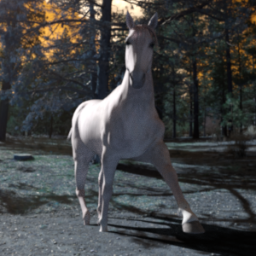

In [9]:
from google.colab.patches import cv2_imshow
cv2_imshow(x[0][0].numpy())

In [10]:
for i in train_ds:
  x = i[0][0]
  y = i[-1][0]
  break

In [11]:
print(y)

tf.Tensor(0, shape=(), dtype=int32)


In [12]:
# Normalizing images
def normalize(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [13]:
# Create cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='sigmoid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(50,kernel_size=(3,3),padding='same',activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(80,kernel_size=(3,3),padding='same',activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='sigmoid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 50)        │          14,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 50)        │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          28,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 80)          │          46,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 80)          │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          92,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,9

 Total params: 1,248,943 (4.76 MB)

 Trainable params: 1,248,235 (4.76 MB)

 Non-trainable params: 708 (2.77 KB)

In [15]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [16]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 180ms/step - Accuracy: 0.7603 - loss: 0.5212 - val_Accuracy: 0.5000 - val_loss: 1.1502
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - Accuracy: 0.9293 - loss: 0.2167 - val_Accuracy: 0.5000 - val_loss: 0.8144
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - Accuracy: 0.9789 - loss: 0.0855 - val_Accuracy: 0.8867 - val_loss: 0.3721
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - Accuracy: 0.9763 - loss: 0.0858 - val_Accuracy: 0.8008 - val_loss: 0.6898
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - Accuracy: 0.9849 - loss: 0.0574 - val_Accuracy: 0.7148 - val_loss: 0.9852
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - Accuracy: 0.9947 - loss: 0.0271 - val_Accuracy: 0.7422 - val_loss: 0.6592
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - Accuracy: 0.9843 - loss: 0.0581 - val_Accuracy: 0.8242 - val_loss: 0.4613
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - Accuracy: 0.9724 - loss: 0.0774 - val_Accuracy: 0.7109

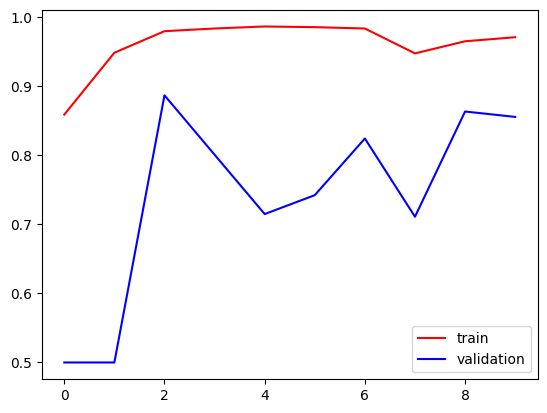

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'],color='red',label='train')
plt.plot(history.history['val_Accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

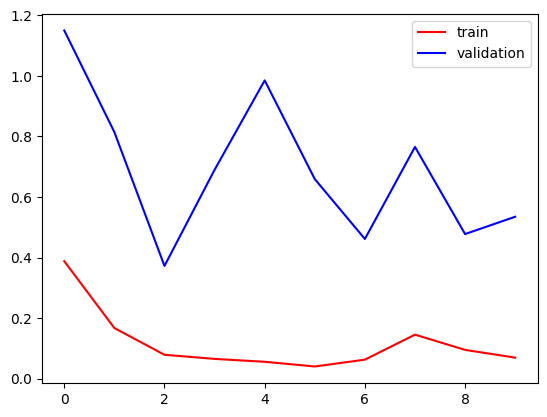

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
model.save('model_iteration_1.h5')

In [20]:
new_model = keras.models.load_model('model_iteration_1.h5')

In [21]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 50)        │          14,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 50)        │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          28,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 80)          │          46,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 80)          │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          92,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,9

 Total params: 1,248,945 (4.76 MB)

 Trainable params: 1,248,235 (4.76 MB)

 Non-trainable params: 708 (2.77 KB)

 Optimizer params: 2 (12.00 B)

In [22]:
import cv2

In [31]:
test_image = cv2.imread('/content/human.jpg')

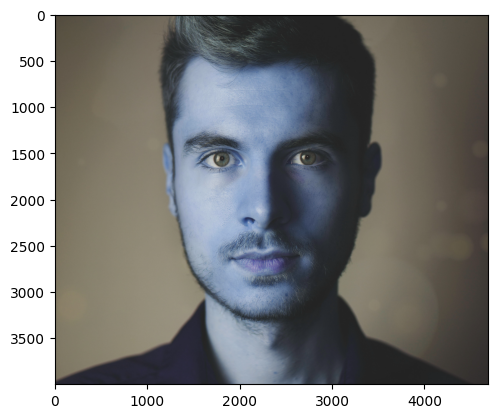

In [32]:
plt.imshow(test_image)

In [33]:
test_image.shape

(4000, 4684, 3)

In [34]:
test_image = cv2.resize(test_image,(256,256))

In [35]:
test_input = test_image.reshape(1,256,256,3)

In [36]:
test_input.shape

(1, 256, 256, 3)

In [37]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.7506901]], dtype=float32)